In [120]:
import numpy as np 
import pandas as pd 

In [121]:
df = pd.read_csv('spam.csv') 

In [122]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4824,ham,I am going to sleep. I am tired of travel.,NaN,NaN,NaN
5517,ham,Miles and smiles r made frm same letters but d...,NaN,NaN,NaN
3427,ham,\Hi darlin did youPhone me? Im atHome if youwa...,NaN,NaN,NaN
2378,ham,"Hi, Mobile no. &lt;#&gt; has added you in th...",NaN,NaN,NaN
4920,ham,Its so common hearin How r u? Wat r u doing? H...,NaN,NaN,NaN


In [123]:
df.shape

(5572, 5)

In [124]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website

## 1 Data Cleaning

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [126]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [127]:
df.rename(columns = {'v1':'Target','v2':'Text'},inplace=True)

In [128]:
df.sample(8)

,Target,Text
2792,ham,Not from this campus. Are you in the library?
3169,ham,"Mah b, I'll pick it up tomorrow"
3087,ham,"'Wnevr i wana fal in luv vth my books, My bed ..."
4920,ham,Its so common hearin How r u? Wat r u doing? H...
3302,ham,"It'll be tough, but I'll do what I have to"
3863,ham,A pure hearted person can have a wonderful smi...
3336,ham,I AM AT THE GAS STATION. GO THERE.
1026,ham,Yes da. Any plm at ur office


In [129]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [130]:
df['Target'] = encoder.fit_transform(df['Target'])

In [131]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
# null valus 
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [133]:
df.duplicated().sum()

np.int64(403)

In [134]:
df = df.drop_duplicates(keep='first')

In [135]:
df.duplicated().sum()

np.int64(0)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int64 
 1   Text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


## 2 EDA

In [137]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [138]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

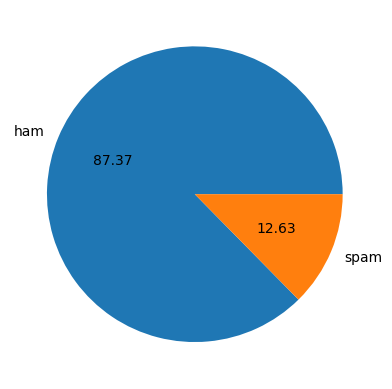

In [139]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [140]:
# Data is Imbalanced

In [141]:
import nltk

In [142]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Gyanendra
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Gyanendra
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [143]:
 df['Num_characters']=df['Text'].apply(len)

In [144]:
df.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [145]:
df.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [146]:
# num of words 
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [147]:
df.head()


,Target,Text,Num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [148]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [149]:
df.head()

,Target,Text,Num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [150]:
df[['Num_characters','num_words','num_sentences']].describe()

,Num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [151]:
df[df['Target']== 0][['Num_characters','num_words','num_sentences']].describe()

,Num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [152]:
df[df['Target']== 1][['Num_characters','num_words','num_sentences']].describe()

,Num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [153]:
import seaborn as sns

<Axes: xlabel='Num_characters', ylabel='Count'>

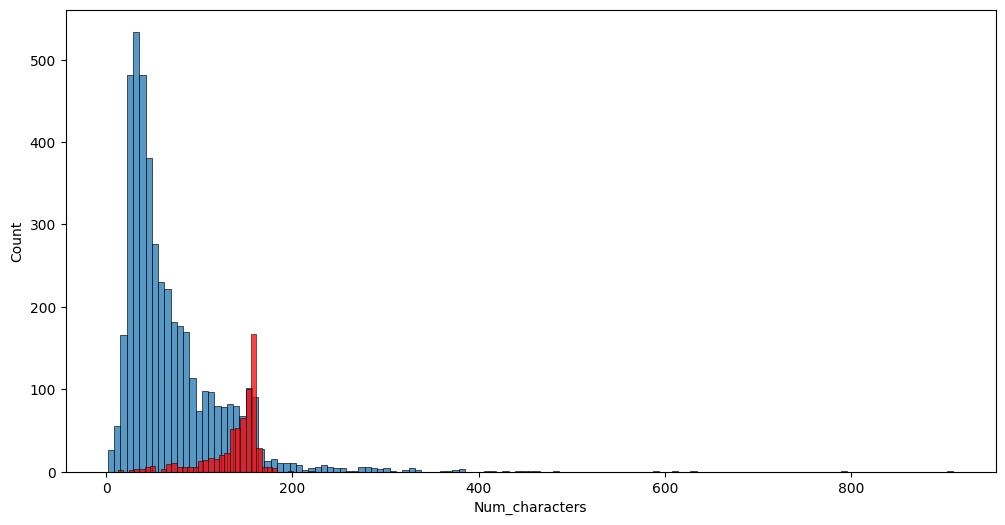

In [154]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Num_characters'])
sns.histplot(df[df['Target'] == 1]['Num_characters'],color ='red')

<Axes: xlabel='num_words', ylabel='Count'>

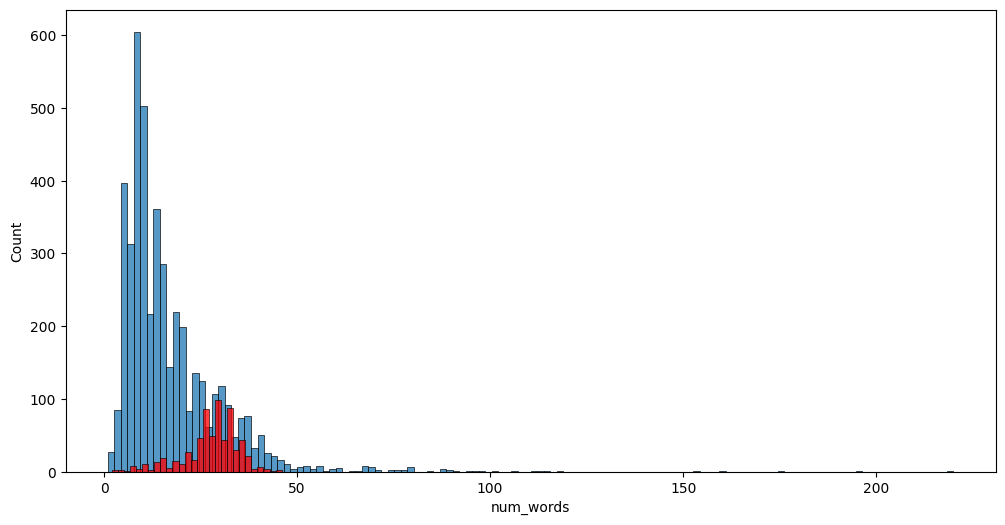

In [155]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color ='red')

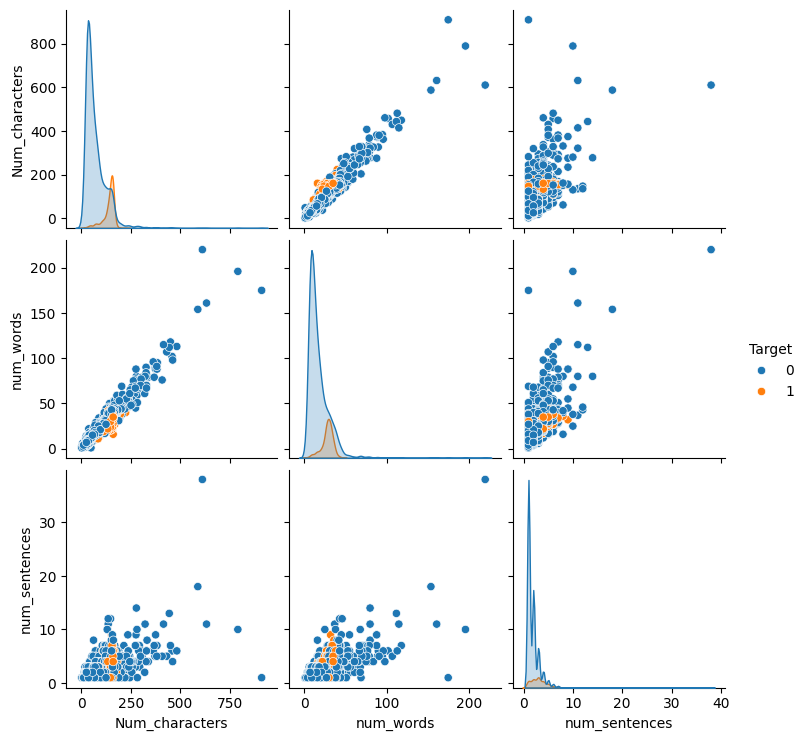

In [156]:
sns.pairplot(df,hue='Target')

<Axes: >

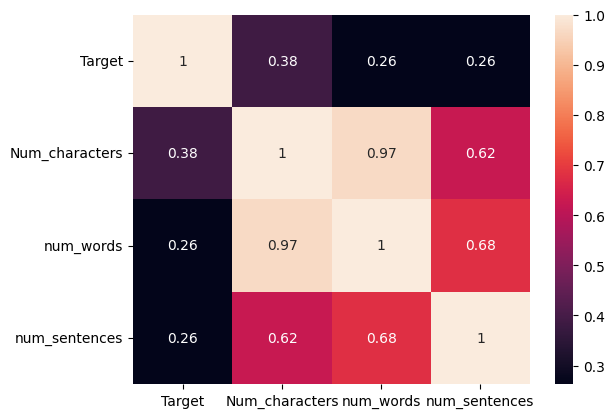

In [157]:
sns.heatmap(df[['Target','Num_characters','num_words','num_sentences']].corr(),annot=True)

# Data Preprocessing
1. Lower case
2. Tokenization
3. Removing specil characters
4. Removing stop words and punctuation
5. Stemming

In [158]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Gyanendra
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [159]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [160]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)
    Text =y[:]
    y.clear()

    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Text =y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return ' '.join(y)        

In [161]:
transform_text('HI I AM GYANENDRA&*%$^* TIWARI loving birds')

'hi gyanendra tiwari love bird'

In [162]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [163]:
df.head()

,Target,Text,Num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [164]:
from wordcloud import WordCloud
wc = WordCloud(width =500,height = 500,min_font_size=10,background_color='black')

In [165]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

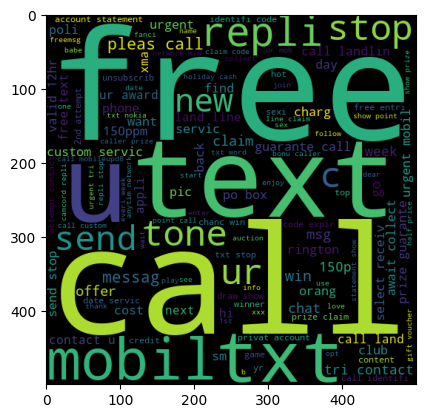

In [166]:
plt.imshow(spam_wc)

In [167]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

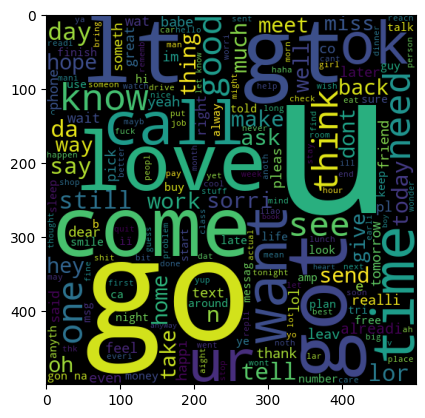

In [168]:
plt.imshow(ham_wc)

In [169]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [170]:
len(spam_corpus)

9939

<Axes: ylabel='0'>

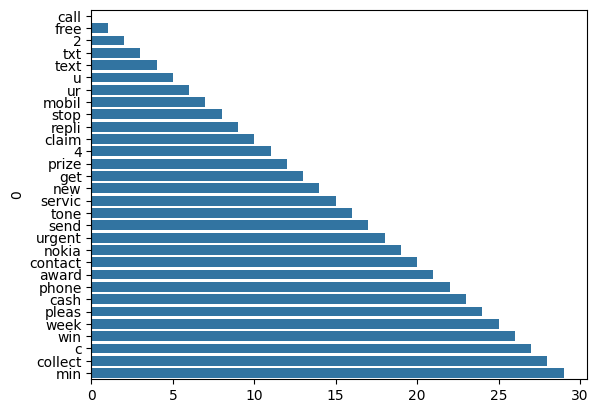

In [171]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [172]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [173]:
len(ham_corpus)

35404

<Axes: ylabel='0'>

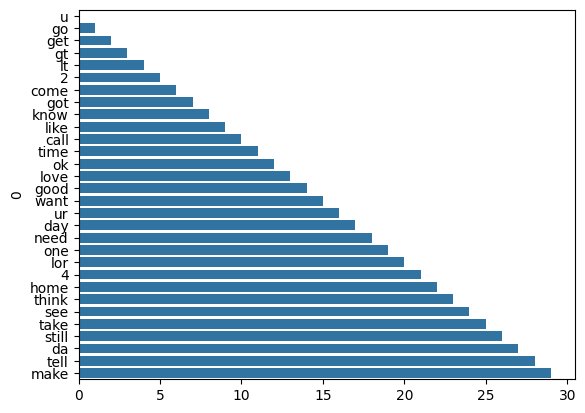

In [174]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

4 Model Building

In [175]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [176]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [177]:
x.shape

(5169, 3000)

In [178]:
y = df['Target'].values

In [179]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [183]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [184]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [185]:
bnb.fit(x_train,y_train)
y_pred2 = bnb.predict(x_test)
accuracy_score(y_test,y_pred2)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [188]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('modle.pkl','wb'))